In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform

In [2]:
df = pd.read_csv('crypto_github_events.csv')
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d").dt.date
df['year'] = df['date'].apply(lambda x: "%d-%d" % (x.year,x.month))
df_2016=df[df['year'].between('2016-01', '2017-01')]

In [3]:
user = df_2016.groupby('userID')
top_ten = user['actions'].count().sort_values(ascending=False).head(10)
print(top_ten)

userID
8iDsKCYEfcL4jeGKxNtPQg    9957
K3WbcDlZUBxBfx8Mv-twSg    6071
-Tf7mnYl8kygw0ZctlhfOw    5619
M5f7BOOVxgnr-XdzMo8bGQ    4100
yhHGzBppxhIRhPkWapTLJQ    4057
Qyz97YBv9rf-V3QYWhkSbw    3525
-a6UdIyZt2IMkKkd1Msv6g    3330
AIVdQMXja0fmjFk_ejf7ow    3180
Li47SClZy_BDxLTc0mN7bQ    3041
oVVUY8Nh5wNqJ0qLROKRkg    2929
Name: actions, dtype: int64


In [4]:
df['month'] = pd.to_datetime(df['date']).dt.strftime('%m/%Y')
time_period = pd.Series(
    pd.date_range("2015-01-01", periods=32, freq="MS")
).apply(lambda row: row.strftime('%m/%Y'))

monthly_df = df.groupby(['userID', 'month'])[
    'actions'].count().reset_index()

In [5]:
def update_monthly_actions(date):
    monthly_actions = monthly_df[['userID', 'actions']][monthly_df['month'] == date]
    monthly_actions = monthly_actions.set_index('userID').rename({'actions': date}, axis=1)
    monthly_actions_df.update(monthly_actions)

monthly_actions_df = pd.DataFrame(
    0, columns=time_period, index=df['userID'].unique())
np.vectorize(lambda date: update_monthly_actions(date))(time_period)

monthly_actions_df.index.name = 'userID'

In [7]:
monthly_actions_2016_df = monthly_actions_df.loc[:, '01/2016':'12/2016']

top_ten_2016 = monthly_actions_2016_df.sum(axis=1).sort_values(ascending=False).head(10).index
top_ten = monthly_actions_2016_df.index.isin(top_ten_2016)
top_ten_2016_df = monthly_actions_2016_df[top_ten].reindex(index=top_ten_2016).reset_index()

print(top_ten_2016_df)
top_ten_2016_df.to_csv('min_kim_result.csv')

                   userID  01/2016  02/2016  03/2016  04/2016  05/2016  \
0  8iDsKCYEfcL4jeGKxNtPQg     78.0   1292.0    745.0    738.0   1183.0   
1  K3WbcDlZUBxBfx8Mv-twSg    395.0    600.0    645.0    721.0    370.0   
2  -Tf7mnYl8kygw0ZctlhfOw    100.0    468.0    357.0    195.0    522.0   
3  M5f7BOOVxgnr-XdzMo8bGQ    523.0    196.0    402.0    429.0    285.0   
4  yhHGzBppxhIRhPkWapTLJQ    125.0    365.0    294.0    336.0    508.0   
5  Qyz97YBv9rf-V3QYWhkSbw      0.0      0.0      0.0      8.0    958.0   
6  -a6UdIyZt2IMkKkd1Msv6g     31.0    417.0    267.0    254.0    379.0   
7  AIVdQMXja0fmjFk_ejf7ow    164.0    179.0    254.0    372.0    335.0   
8  Li47SClZy_BDxLTc0mN7bQ    268.0    247.0    223.0    418.0    324.0   
9  oVVUY8Nh5wNqJ0qLROKRkg    194.0    154.0    186.0    245.0    269.0   

   06/2016  07/2016  08/2016  09/2016  10/2016  11/2016  12/2016  
0    731.0    888.0   1188.0   1090.0    719.0    755.0    550.0  
1    648.0    344.0    424.0    718.0    410.0    4

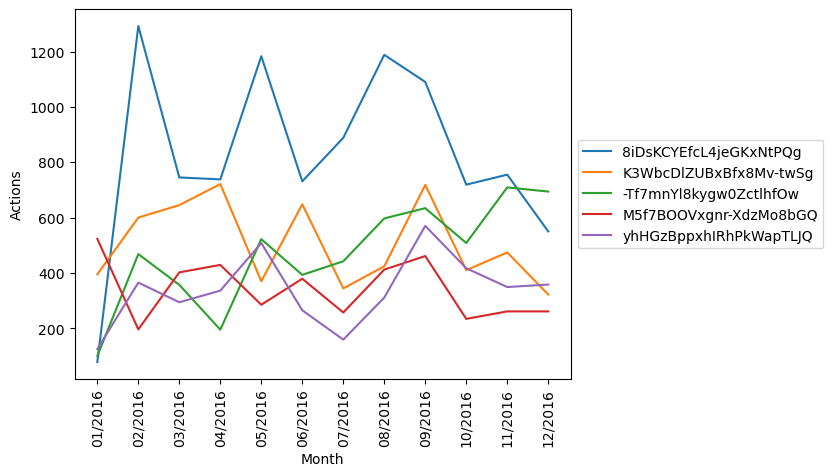

In [8]:
top_five_2016 = monthly_actions_2016_df.sum(axis=1).sort_values(ascending=False).head(5).index
top_five = monthly_actions_2016_df.index.isin(top_five_2016)
top_five_2016_df = monthly_actions_2016_df[top_five].reindex(index=top_five_2016).reset_index()

top_five_2016_df.apply(lambda row: plt.plot(
    row.index[1:].to_list(), row.values[1:], label=row.values[0]), axis=1)
   
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Actions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [9]:
top_two_2016 = monthly_actions_2016_df.sum(axis=1).sort_values(ascending=False).head(2).index
top_two = monthly_actions_2016_df.index.isin(top_two_2016)
top_two_2016_df = monthly_actions_2016_df[top_two].reindex(index=top_two_2016).reset_index()
top_two_2016_df.pop(top_two_2016_df.columns[0])
cosine_similarity(top_two_2016_df)



array([[1.        , 0.91812623],
       [0.91812623, 1.        ]])

In [10]:
distances = pdist(top_two_2016_df.values, metric='euclidean')
dist_matrix = squareform(distances)
print(dist_matrix)

[[   0.         1581.75282519]
 [1581.75282519    0.        ]]


In [11]:
top_two_transpose = top_two_2016_df.T

In [12]:
print(top_two_transpose.corr(method="pearson"))

          0         1
0  1.000000  0.207464
1  0.207464  1.000000


In [13]:
top_six_2016 = monthly_actions_2016_df.sum(axis=1).sort_values(ascending=False).head(6).index
top_six = monthly_actions_2016_df.index.isin(top_six_2016)
top_six_2016_df = monthly_actions_2016_df[top_six].reindex(index=top_six_2016).reset_index()
top_six_2016_df.pop(top_six_2016_df.columns[0])
top_six_transpose = top_six_2016_df.T

In [14]:
print(top_six_transpose.corr(method="pearson"))

          0         1         2         3         4         5
0  1.000000  0.207464  0.493986 -0.386258  0.579829  0.371957
1  0.207464  1.000000 -0.244449  0.389437  0.263534 -0.565895
2  0.493986 -0.244449  1.000000 -0.527445  0.569957  0.572902
3 -0.386258  0.389437 -0.527445  1.000000 -0.190823 -0.352190
4  0.579829  0.263534  0.569957 -0.190823  1.000000  0.388226
5  0.371957 -0.565895  0.572902 -0.352190  0.388226  1.000000
